# Jonathan Halverson
# Tuesday, February 14, 2017
# Analysis of fighter dimensions and stance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
df = pd.read_csv('fightmetric_fighters/fighters.csv', header=0)
df['Fights'] = df['Win'] + df['Loss'] + df['Draw']
df['WinRatio'] = df['Win'] / df['Fights']
df.head(3)

,First,Last,Nickname,Height,Weight,Reach,Stance,Win,Loss,Draw,Belt,Name,Dob,Fights,WinRatio
0,Tom,Aaron,NaN,NaN,155.0,NaN,NaN,5.0,3.0,0.0,0,Tom Aaron,1983-07-03,8.0,0.625000
1,Danny,Abbadi,The Assassin,71.0,155.0,NaN,Orthodox,4.0,6.0,0.0,0,Danny Abbadi,NaN,10.0,0.400000
2,David,Abbott,Tank,72.0,265.0,NaN,Switch,10.0,14.0,0.0,0,David Abbott,1981-09-02,24.0,0.416667


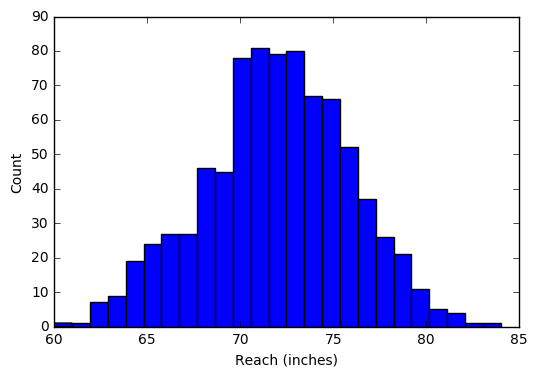

In [3]:
plt.hist(df.Reach.dropna(), bins=25)
plt.xlabel('Reach (inches)')
plt.ylabel('Count')

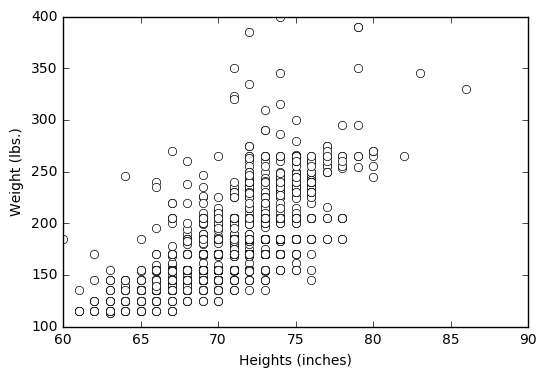

In [4]:
plt.plot(df.Height, df.Weight, 'wo')
plt.xlabel('Heights (inches)')
plt.ylabel('Weight (lbs.)')

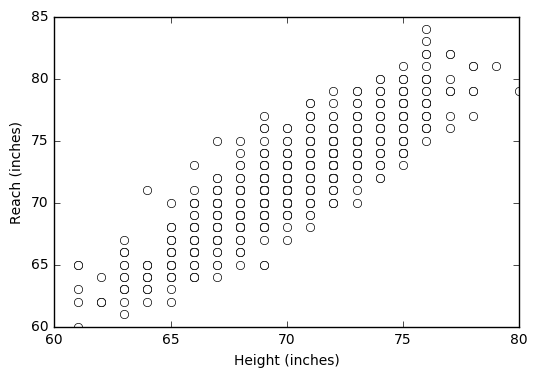

In [5]:
plt.plot(df.Height, df.Reach, 'wo')
plt.xlabel('Height (inches)')
plt.ylabel('Reach (inches)')

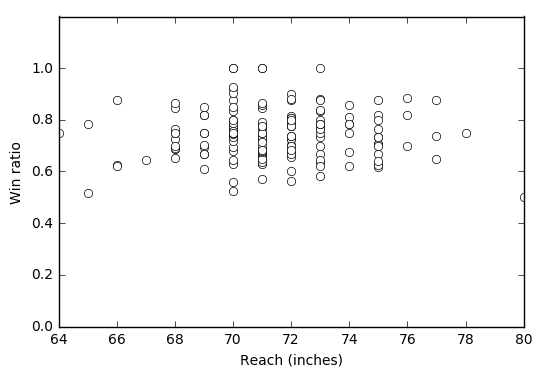

In [6]:
lw = df[(df.Weight == 155.0) & (df.Fights > 5)][['WinRatio', 'Reach']].dropna()
plt.plot(lw.Reach, lw.WinRatio, 'wo')
plt.ylim(0, 1.2)
plt.xlabel('Reach (inches)')
plt.ylabel('Win ratio')

In [7]:
from scipy.stats import pearsonr, spearmanr

pearsonr(lw.Reach, lw.WinRatio), spearmanr(lw.Reach, lw.WinRatio)

((-0.0033084133726401944, 0.96688096897182474),
 SpearmanrResult(correlation=0.013952999836294309, pvalue=0.86098712887711981))

In [8]:
df.groupby('Stance').agg({'WinRatio':[np.size, np.mean, np.std], 'Height':np.mean, 'Reach':np.mean})

Height      Reach WinRatio                    
                  mean       mean     size      mean       std
Stance                                                        
Open Stance  72.666667        NaN      3.0  0.552751  0.163494
Orthodox     70.722642  72.121870   1078.0  0.657552  0.194223
Sideways     72.500000        NaN      2.0  0.583333  0.117851
Southpaw     70.160870  71.817518    231.0  0.682432  0.176863
Switch       70.805556  72.461538     36.0  0.720593  0.159737

In [9]:
df[df.Stance == 'Open Stance']

,First,Last,Nickname,Height,Weight,Reach,Stance,Win,Loss,Draw,Belt,Name,Dob,Fights,WinRatio
44,George,Allen,NaN,74.0,205.0,NaN,Open Stance,13.0,19.0,2.0,0,George Allen,1994-01-22,34.0,0.382353
770,Xavier,Foupa-Pokam,Professor X,73.0,185.0,NaN,Open Stance,21.0,16.0,0.0,0,Xavier Foupa-Pokam,NaN,37.0,0.567568
1731,Flavio Luiz,Moura,NaN,71.0,183.0,NaN,Open Stance,17.0,7.0,0.0,0,Flavio Luiz Moura,1985-08-01,24.0,0.708333


In [10]:
df[df.Stance == 'Sideways']

,First,Last,Nickname,Height,Weight,Reach,Stance,Win,Loss,Draw,Belt,Name,Dob,Fights,WinRatio
955,Keith,Hackney,The Giant Killer,71.0,200.0,NaN,Sideways,2.0,2.0,0.0,0,Keith Hackney,NaN,4.0,0.500000
1793,Jeff,Newton,NaN,74.0,205.0,NaN,Sideways,4.0,2.0,0.0,0,Jeff Newton,1976-08-17,6.0,0.666667


In [11]:
stance = df[df.Stance.isin(['Orthodox', 'Southpaw']) & (df.Fights > 5)].groupby('Stance').agg({'WinRatio':[np.size, np.mean, np.std], 'Height':np.mean, 'Reach':np.mean})
stance

Height      Reach WinRatio                    
               mean       mean     size      mean       std
Stance                                                     
Orthodox  70.653251  72.150592    981.0  0.692142  0.138646
Southpaw  70.018779  71.817518    213.0  0.708568  0.134291

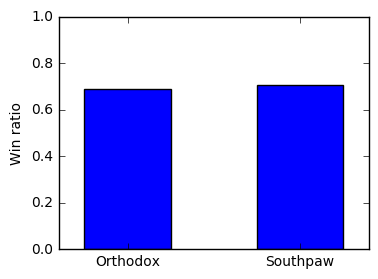

In [12]:
fig = plt.figure(1, figsize=(4, 3))
plt.bar(range(stance.shape[0]), stance[('WinRatio', 'mean')], width=0.5, tick_label=stance.index.values, align='center')
plt.ylim(0, 1)
plt.ylabel('Win ratio')

In [13]:
orthodox = df[(df.Stance == 'Orthodox') & (df.Fights > 5)].WinRatio
southpaw = df[(df.Stance == 'Southpaw') & (df.Fights > 5)].WinRatio

# T-test

(0, 1.2)

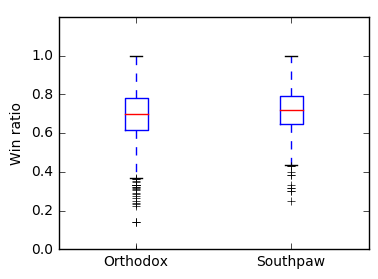

In [14]:
fig = plt.figure(1, figsize=(4, 3))
plt.boxplot([orthodox, southpaw], labels=stance.index)
plt.ylabel('Win ratio')
plt.ylim(0, 1.2)

In [15]:
from scipy.stats import f_oneway

F_statistic, p_value = f_oneway(orthodox, southpaw)
F_statistic, p_value, p_value > 0.05

(2.4837746066138235, 0.11529124953873317, True)